# MEMBUAT MODEL DECISION TREE

In [56]:
#import library yang digunakan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


IMPORT DATA KUISIONER ASLI

In [57]:
# import dataset
KuisionerAsli = pd.read_csv('Kuisioner.csv')
KuisionerAsli.head(5)

,Timestamp,Nama Mahasiswa,"Umur Mahasiswa (angka, ex: 20)",Jenis Kelamin Mahasiswa,Asal Instansi Mahasiswa,Apakah anda menggunakan media sosial secara aktif?,Berapa durasi waktu Anda dalam menggunakan media sosial tiap harinya?,Apa Media Sosial yang sering Anda gunakan?,Apakah Anda merasa penggunaan media sosial berpengaruh pada kesejahteraan mental Anda?,Apakah anda merasa berbagai konten dalam media sosial dapat berguna untuk hidup Anda?,Apakah anda merasa lebih bahagia ketika Aktif menggunakan media sosial?,Apakah Anda pernah merasa cemas atau stress setelah melihat konten di media sosial?,Apa konten yang sering membuat Anda Stress?,Apakah anda setuju kegiatan dan aktifitas fisik dapat mengurangi rasa stress?,"Berapa durasi tidur Anda tiap harinya? (jam, ex:9)","Berapa rata-rata durasi aktifitas real-life Anda tiap harinya(tidak menggunakan media sosial)? (jam, ex: 3)"
0,30/09/2023 12:15:34,sadat,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Tiktok",Berpengaruh,4,2,Ya,akhirat,Ya,4,8
1,30/09/2023 12:18:10,Mochamad Afifuddin,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,Instagram,Berpengaruh,4,4,Ya,Politik,Ya,5,7
2,30/09/2023 17:53:57,Riry,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Youtube",Berpengaruh,4,3,Ya,Iklan,Ya,6,8
3,30/09/2023 18:30:34,Bulan,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,Tiktok,Berpengaruh,5,5,Ya,Pendidikan,Ya,7,6
4,30/09/2023 23:07:06,Valen,20,Perempuan,Universitas Airlangga,Ya,> 8 jam,"Instagram, Tiktok",Berpengaruh,5,5,Tidak,Pendidikan,Ya,6,6


IMPORT DATA KUISIONER YANG SUDAH TERLABEL

In [58]:
# import dataset
KuisionerLabel = pd.read_csv('KuisionerWithLabel.csv')
KuisionerLabel.head(5)

,Timestamp,Nama Mahasiswa,"Umur Mahasiswa (angka, ex: 20)",Jenis Kelamin Mahasiswa,Asal Instansi Mahasiswa,Apakah anda menggunakan media sosial secara aktif?,Berapa durasi waktu Anda dalam menggunakan media sosial tiap harinya?,Apa Media Sosial yang sering Anda gunakan?,Apakah Anda merasa penggunaan media sosial berpengaruh pada kesejahteraan mental Anda?,Apakah anda merasa berbagai konten dalam media sosial dapat berguna untuk hidup Anda?,Apakah anda merasa lebih bahagia ketika Aktif menggunakan media sosial?,Apakah Anda pernah merasa cemas atau stress setelah melihat konten di media sosial?,Apa konten yang sering membuat Anda Stress?,Apakah anda setuju kegiatan dan aktifitas fisik dapat mengurangi rasa stress?,"Berapa durasi tidur Anda tiap harinya? (jam, ex:9)","Berapa rata-rata durasi aktifitas real-life Anda tiap harinya(tidak menggunakan media sosial)? (jam, ex: 3)",Cluster_Labels
0,30/09/2023 12:15:34,sadat,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Tiktok",Berpengaruh,4,2,Ya,akhirat,Ya,4,8,0
1,30/09/2023 12:18:10,Mochamad Afifuddin,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,Instagram,Berpengaruh,4,4,Ya,Politik,Ya,5,7,0
2,30/09/2023 17:53:57,Riry,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Youtube",Berpengaruh,4,3,Ya,Iklan,Ya,6,8,0
3,30/09/2023 18:30:34,Bulan,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,Tiktok,Berpengaruh,5,5,Ya,Pendidikan,Ya,7,6,0
4,30/09/2023 23:07:06,Valen,20,Perempuan,Universitas Airlangga,Ya,> 8 jam,"Instagram, Tiktok",Berpengaruh,5,5,Tidak,Pendidikan,Ya,6,6,0


IMPORT DATA FIX YANG AKAN DIGUNAKAN UNTUK MEMBUAT MODEL

In [59]:
# import dataset
df = pd.read_csv('dataFix.csv')
df.head(5)

,Umur,Jenis Kelamin,Aktif Sosial Media,Durasi Sosmed,Pengaruh Konten Medsos Untuk Hidup,Tingkat Kebahagiaan Aktif Medsos,Kecemasan Terhadap Konten Medsos,Aktifitas Fisik Mengurangi Stress,Durasi Tidur,Durasi Tanpa Medsos,Cluster_Labels
0,19,0,1,0,4,2,1,1,4,8,0
1,19,0,1,0,4,4,1,1,5,7,0
2,19,1,1,0,4,3,1,1,6,8,0
3,19,1,1,0,5,5,1,1,7,6,0
4,20,1,1,2,5,5,0,1,6,6,0


In [60]:
df.drop(df.columns[[2,3,4,5,6,7]], axis=1, inplace=True)
df


,Umur,Jenis Kelamin,Durasi Tidur,Durasi Tanpa Medsos,Cluster_Labels
0,19,0,4,8,0
1,19,0,5,7,0
2,19,1,6,8,0
3,19,1,7,6,0
4,20,1,6,6,0
...,...,...,...,...,...
70,20,0,4,5,0
71,21,0,4,6,0
72,20,0,5,15,0
73,19,0,6,7,0


In [61]:
#split dataset in features and target variable
feature_cols = [            
                    'Durasi Tidur', 
                    'Jenis Kelamin', 
                    'Durasi Tanpa Medsos',
                    'Umur',
                ]

target_cols = ['Cluster_Labels']

X = df[feature_cols] # Features
y = df[target_cols] # Target variable


In [62]:
# Split dataset menjadi data test dan train 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=42)

In [63]:
# Create Decision Tree classifer object
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

clf = DecisionTreeClassifier(
    
    criterion='entropy',
    splitter='random',
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    class_weight='balanced',
    ccp_alpha=0.01,
    min_impurity_decrease=0.05  # Eksperimen dengan nilai yang lebih tinggi
)
 
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
y_pred = clf.predict(X_test)



In [64]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       1.00      1.00      1.00         6
           2       0.80      0.67      0.73         6

    accuracy                           0.87        23
   macro avg       0.88      0.86      0.87        23
weighted avg       0.87      0.87      0.87        23



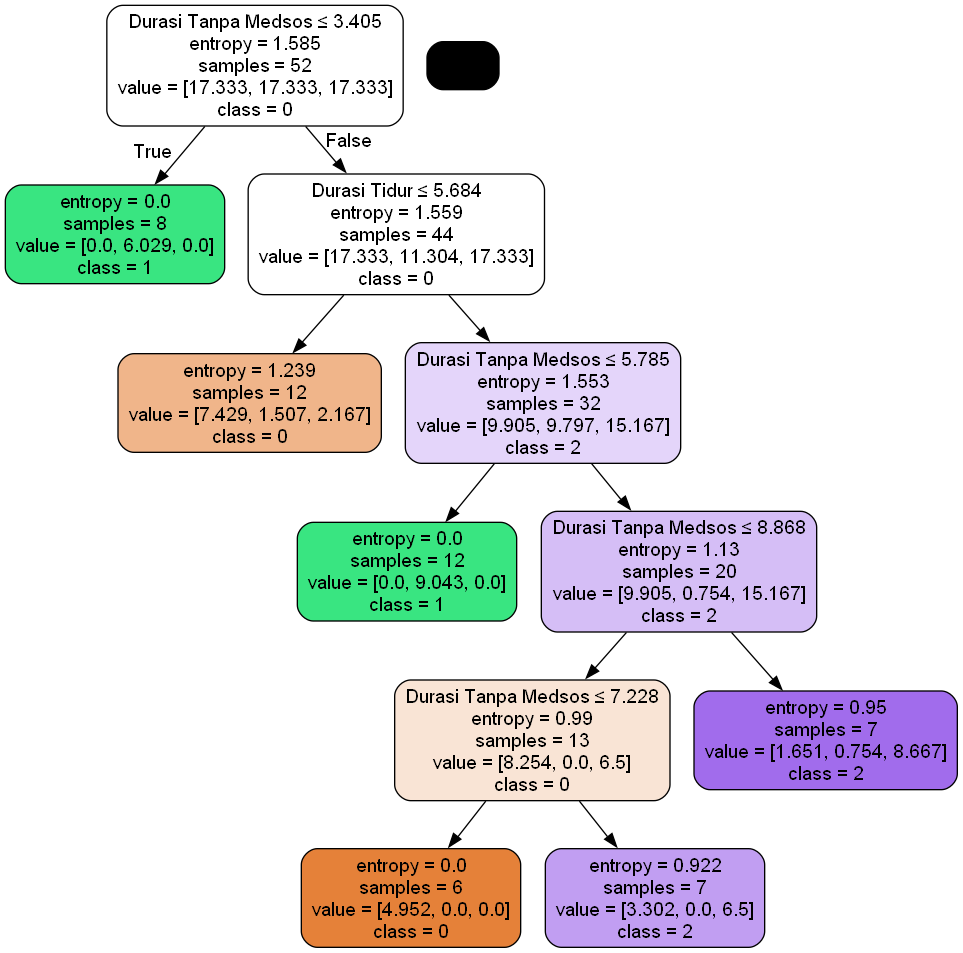

In [65]:
import os
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Buat objek StringIO untuk menyimpan representasi DOT dari decision tree
dot_data = StringIO()

# Export decision tree ke dalam format DOT
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns,  # Gantilah dengan nama kolom fitur Anda
                class_names=clf.classes_.astype(str))

# Buat objek grafik dari DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Tampilkan grafik decision tree (as gambar)
Image(graph.create_png())


In [66]:
import pickle
# Simpan model ke file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)